In [73]:
import numpy as np 
import torch

import torch.nn as nn
import torch.nn.functional as F 

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

torch.manual_seed(446)
np.random.seed(446)

In [74]:
x_numpy = np.array([.1,.2,.3])
x_torch = torch.tensor([.1,.2,.3])
print(x_numpy, x_torch)

[0.1 0.2 0.3] tensor([0.1000, 0.2000, 0.3000])


In [75]:
print(torch.from_numpy(x_numpy), x_torch.numpy)

tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64) <built-in method numpy of Tensor object at 0x7fe365d84ca8>


In [76]:
y_numpy = np.array([3,4,5])
y_torch = torch.tensor([3,4,5])

print(x_numpy + y_numpy)
print(x_torch + y_torch)

[3.1 4.2 5.3]
tensor([3.1000, 4.2000, 5.3000])


In [77]:
N, C, W, H = 10000, 3, 28, 28
X = torch.randn((N, C, W, H))

print(X.shape)
print(X.view(N, C, 784).shape)

torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])


---

# Linear regression E.G.

Let $w = [w_{1}, w_{2}]^{T}$

Consider $g(w) = 2w_{1}w_{2} + w_{2}cos(w_{1})$

Q: Compute  $\nabla_{w}g(w)$ and verify $\nabla_{w}g([\pi, 1]) = [2, \pi - 1]^{T}$

In [78]:
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)

z =g(w)
z.backward()

print(z)

print(grad_g(w))
print(w.grad)

tensor(5.2832, grad_fn=<AddBackward0>)
tensor([2.0000, 5.2832])
tensor([2.0000, 5.2832])


---

For **pytorch.tensor**:

`@` matrix multiplication

`*` matrix is multiplited by elements 


In [79]:
d = 2
n = 50
X = torch.randn(n, d)
true_w = torch.tensor([[-1.0], [2.0]])
y = X @ true_w + torch.randn(n, 1) * 0.1

print(X.shape)
print(y.shape)
print(true_w)

torch.Size([50, 2])
torch.Size([50, 1])
tensor([[-1.],
        [ 2.]])


In [80]:
# defien a linear model with no bias
def model(X, w):
    return X @ w

# the residual sum of squares loss function
def rss(y, y_hat): 
    return torch.norm(y - y_hat)**2 / n

# analytical expression for the gradient
def grad_rss(X, y, w):
    return -2*X.t() @ (y - X @ w) / n

w = torch.tensor([[1.], [0]], requires_grad=True)
y_hat = model(X, w)

loss = rss(y, y_hat)
loss.backward()

print(grad_rss(X, y, w).detach().view(2).numpy())
print(w.grad.view(2).numpy())

[ 5.1867113 -5.5912566]
[ 5.186712  -5.5912566]


In [81]:
step_size = 0.1
print('iter \tloss \tw')

for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)

    loss.backward()

    w.data = w.data - step_size*w.grad

    print('{} \t{:.2f} \t{}'.format(i, loss.item(), w.view(2).detach().numpy()))

    w.grad.detach()
    w.grad.zero_()

print(true_w.view(2).numpy())
print(w.view(2).detach().numpy())
    

iter 	loss 	w
0 	10.80 	[-0.03734243  1.1182513 ]
1 	2.31 	[-0.28690195  1.3653738 ]
2 	1.24 	[-0.4724271  1.5428905]
3 	0.67 	[-0.6105486  1.6702049]
4 	0.36 	[-0.71353513  1.7613506 ]
5 	0.20 	[-0.79044634  1.8264704 ]
6 	0.11 	[-0.8479796  1.8728881]
7 	0.06 	[-0.89109135  1.9058872 ]
8 	0.04 	[-0.92345405  1.9292755 ]
9 	0.03 	[-0.94779253  1.9457937 ]
10 	0.02 	[-0.9661309  1.957412 ]
11 	0.01 	[-0.97997516  1.9655445 ]
12 	0.01 	[-0.9904472  1.9712044]
13 	0.01 	[-0.9983844  1.9751165]
14 	0.01 	[-1.0044125  1.9777979]
15 	0.01 	[-1.0090001  1.9796168]
16 	0.01 	[-1.0124985  1.9808345]
17 	0.01 	[-1.0151719  1.9816359]
18 	0.01 	[-1.0172188  1.9821515]
19 	0.01 	[-1.0187894  1.9824725]
[-1.  2.]
[-1.0187894  1.9824725]


## torch.nn.Module

- normal function(e.g. linear)
- Activation function
- Sequential
- Loss function

## torch.optim

PyTorch implements a number of gradient-based optimization methods in `torch.optim`, including Gradient Descent. At the minimum, it takes in the model parameters and a learning rate.



In [82]:
step_size = 0.1

linear_module = nn.Linear(d, 1, bias=False)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)

print('iter \tloss \tw')

for i in range(20):
    y_hat = linear_module(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

    print('{} \t{:.2f} \t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print(true_w.view(2).numpy())
print(linear_module.weight.view(2).detach().numpy())

iter 	loss 	w
0 	9.44 	[-0.10015943  0.29333583]
1 	5.02 	[-0.36225495  0.7438717 ]
2 	2.68 	[-0.55093014  1.0737375 ]
3 	1.43 	[-0.6865733  1.3153571]
4 	0.76 	[-0.78394604  1.4924208 ]
5 	0.41 	[-0.8537292  1.6222423]
6 	0.22 	[-0.90364546  1.7174783 ]
7 	0.12 	[-0.93927413  1.7873837 ]
8 	0.07 	[-0.9646425  1.8387285]
9 	0.04 	[-0.9826546  1.8764668]
10 	0.03 	[-0.9954021  1.9042246]
11 	0.02 	[-1.0043899  1.9246577]
12 	0.01 	[-1.0106989  1.9397117]
13 	0.01 	[-1.0151048  1.9508128]
14 	0.01 	[-1.0181624  1.9590069]
15 	0.01 	[-1.0202686  1.9650615]
16 	0.01 	[-1.0217061  1.9695402]
17 	0.01 	[-1.0226762  1.9728571]
18 	0.01 	[-1.0233213  1.9753166]
19 	0.01 	[-1.023742   1.9771428]
[-1.  2.]
[-1.023742   1.9771428]


# Linear regression using SGD

In [83]:
step_size = 0.1

linear_module = nn.Linear(d, 1)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)

print('iter \tloss \tw')

for i in range(200):
    rand_idx = np.random.choice(n)  # take a random point from the dataset
    x = X[rand_idx]
    y_hat = linear_module(x)
    loss = loss_func(y_hat, y[rand_idx])
    optim.zero_grad()
    loss.backward()
    optim.step()

    if i % 20 == 0:
        print('{} \t{:.2f} \t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print(true_w.view(2).numpy())
print(linear_module.weight.view(2).detach().numpy())

iter 	loss 	w
0 	0.55 	[ 0.6822317  -0.27078918]
20 	0.02 	[-0.95954275  2.0444818 ]
40 	0.00 	[-0.9862002  1.9473346]
60 	0.00 	[-1.0051985  1.9425567]
80 	0.01 	[-1.0317879  1.954527 ]
100 	0.00 	[-1.0033169  1.9728222]
120 	0.00 	[-0.9680954  2.024574 ]
140 	0.00 	[-1.0104676  1.9256995]
160 	0.01 	[-1.0522187  1.9648198]
180 	0.00 	[-1.015739   1.9288875]
[-1.  2.]
[-0.9759326  1.9987428]


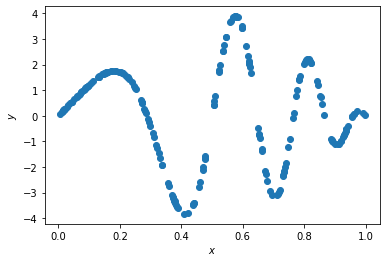

In [84]:
%matplotlib inline

d = 1
n = 200
X = torch.rand(n, d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6 * np.pi * X**2)

plt.scatter(X.numpy(), y.numpy())

plt.ylabel('$y$')
plt.xlabel('$x$')

plt.show()

In [85]:
step_size = 0.05
n_epochs = 6000
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
    nn.Linear(d, n_hidden_1),
    nn.Tanh(),
    nn.Linear(n_hidden_1, n_hidden_2),
    nn.Tanh(),
    nn.Linear(n_hidden_2, d_out)
)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(neural_network.parameters(), 
                        lr=step_size)

print('iter \tloss \tw')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step() 

    if i % (n_epochs // 10) == 0:
        print('{} \t{:.2f} \t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print(true_w.view(2).numpy())
print(linear_module.weight.view(2).detach().numpy())


iter 	loss 	w
0 	3.79 	[-0.9759326  1.9987428]
600 	3.58 	[-0.9759326  1.9987428]
1200 	2.76 	[-0.9759326  1.9987428]
1800 	1.27 	[-0.9759326  1.9987428]
2400 	0.95 	[-0.9759326  1.9987428]
3000 	0.45 	[-0.9759326  1.9987428]
3600 	0.16 	[-0.9759326  1.9987428]
4200 	0.07 	[-0.9759326  1.9987428]
4800 	0.06 	[-0.9759326  1.9987428]
5400 	0.05 	[-0.9759326  1.9987428]
[-1.  2.]
[-0.9759326  1.9987428]


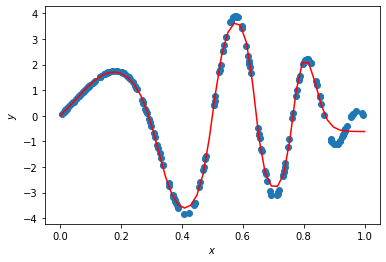

In [86]:
X_grid = torch.from_numpy(np.linspace(0, 1, 50)).float().view(-1, d)
y_hat = neural_network(X_grid)

plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')

plt.ylabel('$y$')
plt.xlabel('$x$')

plt.show()

## Momentum

In [87]:
step_size = 0.05
n_epochs = 2000
momentum = 0.9
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = nn.Sequential(
    nn.Linear(d, n_hidden_1),
    nn.Tanh(),
    nn.Linear(n_hidden_1, n_hidden_2),
    nn.Tanh(),
    nn.Linear(n_hidden_2, d_out)
)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(neural_network.parameters(), 
                        lr=step_size,
                        momentum=momentum)

print('iter \tloss \tw')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step() 

    if i % (n_epochs // 10) == 0:
        print('{} \t{:.2f} \t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print(true_w.view(2).numpy())
print(linear_module.weight.view(2).detach().numpy())


iter 	loss 	w
0 	3.72 	[-0.9759326  1.9987428]
200 	2.63 	[-0.9759326  1.9987428]
400 	0.49 	[-0.9759326  1.9987428]
600 	0.06 	[-0.9759326  1.9987428]
800 	0.04 	[-0.9759326  1.9987428]
1000 	0.01 	[-0.9759326  1.9987428]
1200 	0.00 	[-0.9759326  1.9987428]
1400 	0.00 	[-0.9759326  1.9987428]
1600 	0.00 	[-0.9759326  1.9987428]
1800 	0.00 	[-0.9759326  1.9987428]
[-1.  2.]
[-0.9759326  1.9987428]
